In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
#Importing the dataset
data =pd.read_csv("Telcom_Customer_Churn_Cleaned.csv")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_years
0,Female,0,Yes,No,-1.277445,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994242,No,0.083333
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,-0.259629,-0.173244,No,2.833333
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.959674,Yes,0.166667
3,Male,0,No,No,0.514251,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.194766,No,3.750000
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.940470,Yes,0.166667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()/len(data)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.shape

(7043, 21)

In [10]:
# Inspect data types and missing values
data_info = {
    "Columns": data.columns.tolist(),
    "Missing_Values": data.isnull().sum().to_dict(),
    "Data_Types": data.dtypes.to_dict()
}
data_info

{'Columns': ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn'],
 'Missing_Values': {'customerID': 0,
  'gender': 0,
  'SeniorCitizen': 0,
  'Partner': 0,
  'Dependents': 0,
  'tenure': 0,
  'PhoneService': 0,
  'MultipleLines': 0,
  'InternetService': 0,
  'OnlineSecurity': 0,
  'OnlineBackup': 0,
  'DeviceProtection': 0,
  'TechSupport': 0,
  'StreamingTV': 0,
  'StreamingMovies': 0,
  'Contract': 0,
  'PaperlessBilling': 0,
  'PaymentMethod': 0,
  'MonthlyCharges': 0,
  'TotalCharges': 0,
  'Churn': 0},
 'Data_Types': {'customerID': dtype('O'),
  'gender': dtype('O'),
  'SeniorCitizen': dtype('int64'),
  'Partner': dtype('O'),
  'Dependents': dtype('O'),
  'tenure': dtype('int

In [11]:
data.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
# Convert categorical variables to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # Handle TotalCharges as numeric
data = data.dropna()  # Drop rows with missing values
data = pd.get_dummies(data, drop_first=True)  # Convert categorical to dummy variables

In [ ]:
#logistic regression model for will customer churn prediction

In [20]:
# Define features (X) and target (y)
X = data.drop(columns=['Churn_Yes'])  # Target is 'Churn_Yes'
y = data['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
 
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1370  179]
 [ 240  321]]

Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      1549
        True       0.64      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110


Accuracy Score:
0.8014218009478673


C:\Users\ivika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Random forest classifier for  Will the customer churn

In [36]:
# Drop customerID as it's not useful for prediction
data = data.drop(['customerID', 'MonthlyCharges','tenure'], axis=1)
# Check for missing values
data.isnull().sum()

# If there are missing values, you can fill them or drop the rows
# For example, fill missing values with the mean or median
# df = df.fillna(df.mean())
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
    # Drop TotalCharges if it has a square relationship with MonthlyCharges
data = data.drop(['TotalCharges'], axis=1)
# Define features (X) and target (y)
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[912 124]
 [194 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.48      0.53       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409


Accuracy Score:
0.7743080198722498


In [ ]:
#Decision tree classifier for  Will the customer churn

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



# Select only the relevant features
features = ["tenure", "MonthlyCharges", "TotalCharges", "Contract", 
            "InternetService", "OnlineSecurity", "TechSupport", "PaymentMethod"]
target = "Churn"

# Drop missing values
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for col in ["Contract", "InternetService", "OnlineSecurity", "TechSupport", "PaymentMethod"]:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Encode target variable (Churn: Yes=1, No=0)
data[target] = data[target].map({'Yes': 1, 'No': 0})

# Define features and target
X = data[features]
y = data[target]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier with hyperparameter tuning
dt_model = DecisionTreeClassifier(
    criterion="gini",  # Can also try "entropy"
    max_depth=6,        # Controls tree depth to avoid overfitting
    min_samples_split=20,  # Minimum samples needed to split a node
    min_samples_leaf=10,  # Minimum samples needed in a leaf node
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("📊 Model Accuracy:", round(accuracy * 100, 2), "%")
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))


📊 Model Accuracy: 79.77 %

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
#Train and evaluate Random Forest and XGBoost models to predict customer churn.

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



# Encode categorical variables
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
               'PaperlessBilling', 'PaymentMethod', 'Churn']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


# Handle missing values (if any)
data = data.fillna(data.median())

# Separate features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8090844570617459
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
 [[948  88]
 [181 192]]


In [80]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8055358410220014
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
 [[937  99]
 [175 198]]



ROC-AUC Score:
0.8360525852456131


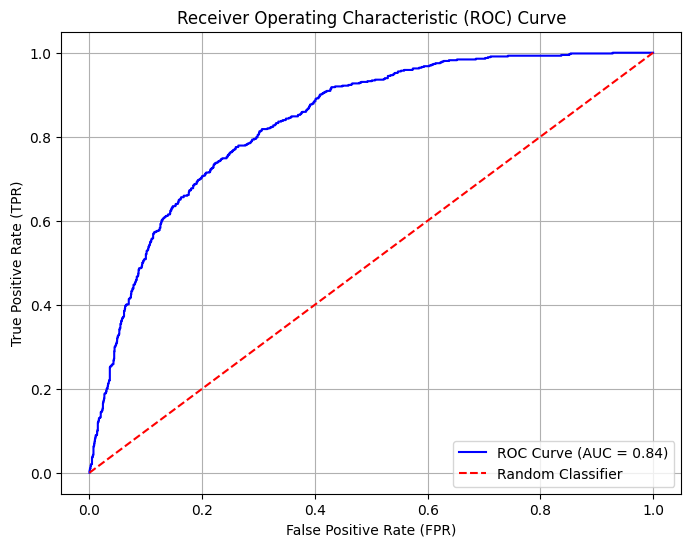

In [17]:
# Import necessary libraries for ROC and AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:")
print(roc_auc)

# Compute the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# ROC AUC Score is 0.8 

In [ ]:
# Observation from the result is

# Accuracy: The model achieves an accuracy of 80%, which means that the model correctly predicts the churn status (True or False) for 80% of the cases in the dataset.

# AUC-ROC Curve Score: The AUC-ROC score is 0.8, which indicates that the model has a good ability to distinguish between the classes (churn vs. no churn). 

# Confusion Matrix: The confusion matrix is:
# [1370  179]
# [ 240  321]
#True Negatives (TN): 1370 customers who did not churn and were correctly classified as non-churned.
#False Positives (FP): 179 customers who did not churn but were incorrectly classified as churned.
#False Negatives (FN): 240 customers who churned but were incorrectly classified as not churned.
#True Positives (TP): 321 customers who churned and were correctly classified as churned.

# Classification Report:
#Precision (False): 0.85 – The precision for the class 'False' (non-churn) is high, indicating that when the model predicts no churn, it is correct 85% of the time.
#Recall (False): 0.88 – The recall for 'False' is also quite high, suggesting that the model correctly identifies 88% of the non-churn customers.
#Precision (True): 0.64 – The precision for the class 'True' (churn) is lower, meaning that when the model predicts churn, it is correct only 64% of the time.
#Recall (True): 0.57 – The recall for 'True' is quite low, indicating that the model fails to correctly identify about 43% of the churned customers.
#F1-Score (True): 0.61 – This is a balanced metric considering both precision and recall for the 'True' class. A value of 0.61 is moderate, but there is room for improvement in identifying churned customers.

#Macro Average: The macro average for precision, recall, and F1-score is lower than the individual scores for the 'False' class, indicating that the model is better at predicting non-churn customers.

#Weighted Average: The weighted average for precision, recall, and F1-score is 0.80, indicating the model performs reasonably well overall.

#Good Performance on Non-Churn Class: The model performs well in predicting non-churn customers, as reflected in the high precision (0.85) and recall (0.88) for the 'False' class. 
#This suggests that the model is reliable in identifying customers who will not churn.

In [ ]:
#Predicting customer churn for the next two years.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

#Importing the dataset
data =pd.read_csv("Telco Customer Churn.csv")
data.head()

# Step 1: Handle Missing Values
# Convert 'TotalCharges' to numeric, coerce errors, and fill missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


# Step 2: Encode Categorical Features
# Identify categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']

# Use LabelEncoder for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store for decoding later if needed

# Step 3: Feature Engineering (Optional - Adding future tenure)
data['FutureTenure'] = data['tenure'] + 24  # Simulate tenure 2 years from now

# Step 4: Define Features and Target
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict Churn Probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Add predictions back to test set
X_test['Churn_Probability'] = y_prob
X_test['Actual_Churn'] = y_test.values

# Step 8: Rank Customers by Churn Risk
future_churn_predictions = X_test.sort_values(by='Churn_Probability', ascending=False)

# Display Top 50 Customers with High Churn Risk
print("Top 50 Customers Predicted to Churn in the Next 2 Years:")
print(future_churn_predictions.head(50))

# Step 9: Evaluate the Model
y_pred = model.predict(X_test.drop(['Churn_Probability', 'Actual_Churn'], axis=1))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Top 50 Customers Predicted to Churn in the Next 2 Years:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4800       1              1        0           0       1             1   
5782       0              1        0           0       1             1   
2208       0              1        1           0       1             1   
6933       1              0        0           0       1             1   
2184       0              1        0           0       2             1   
1600       1              1        0           0       1             1   
970        0              0        0           0       1             1   
2577       0              0        0           0       1             1   
1410       0              1        0           0       2             1   
3346       0              1        0           0       2             1   
1144       1              0        0           0       1             0   
5640       1              0        0           0       

In [ ]:
#Top 50 customers with the highest churn probability for the next 2 years.

In [ ]:
#likelihood of churn for a specific customer

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
data = pd.read_csv("Telco Customer Churn.csv")

# Step 1: Handle Missing Values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)    # Fill missing values with median

# Step 2: Encode Categorical Variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

encoders = {}  # Dictionary to store LabelEncoders for later use
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    encoders[col] = encoder  # Save the encoder for each column

# Step 3: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Step 4: Split Data into Training and Testing Sets
X = data.drop(['Churn', 'customerID'], axis=1)  # Features
y = data['Churn']                              # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of churn
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Step 7: Predict Churn Likelihood for a Specific Customer
# Example Customer Data
specific_customer = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 85.5,
    'TotalCharges': 1020.5
}

# Convert specific_customer to a DataFrame
specific_customer_df = pd.DataFrame([specific_customer])

# Encode categorical variables using the saved encoders
for col in categorical_columns:
    encoder = encoders[col]
    specific_customer_df[col] = encoder.transform(specific_customer_df[col])

# Scale numerical variables
specific_customer_df[numerical_columns] = scaler.transform(specific_customer_df[numerical_columns])

# Predict Likelihood of Churn
churn_likelihood = model.predict_proba(specific_customer_df)[:, 1]
print("Likelihood of Churn for Specific Customer:", churn_likelihood[0])


C:\Users\ivika\AppData\Local\Temp\ipykernel_9852\2268971235.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)    # Fill missing values with median


              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC-AUC Score: 0.8614735474655046
Likelihood of Churn for Specific Customer: 0.6229176414300786


In [ ]:
#Train XGBClassifier

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


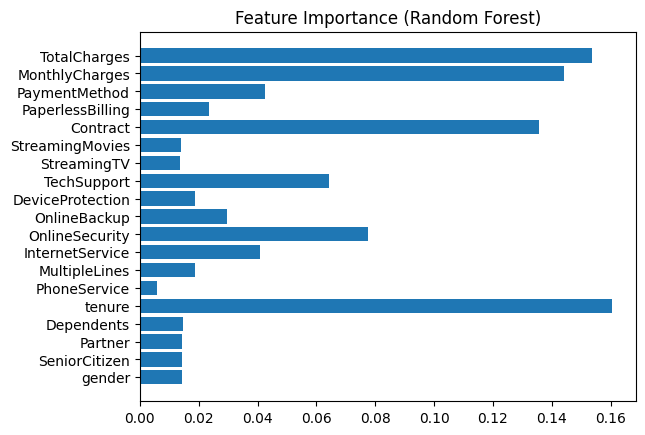

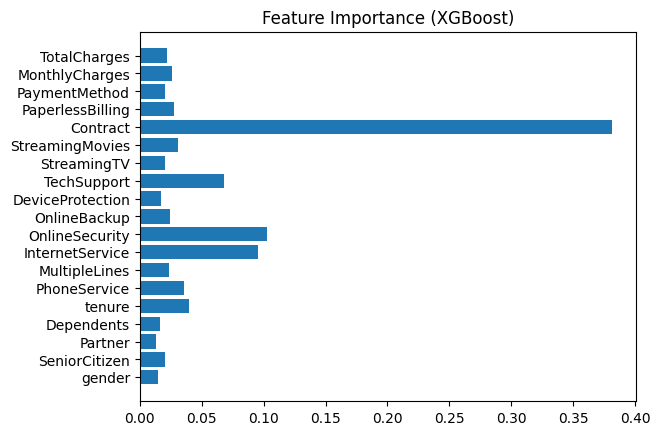

In [82]:
import matplotlib.pyplot as plt

# For Random Forest
importances = rf_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

# For XGBoost
importances = xgb_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [84]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.8076650106458482


In [ ]:
 #Train XGBoost Classifier

In [4]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
df = pd.read_csv('Telcom_Customer_Churn_Cleaned.csv')

df['tenure'].min()  # Returns the smallest value in the tenure column

# Step 2: Load Data
df = pd.read_csv("Telco Customer Churn.csv")  # Replace with your actual dataset file

# Step 3: Drop CustomerID (not useful for prediction)
df.drop(columns=["customerID"], inplace=True)

# Step 4: Handle Missing Values
df = df.dropna()  # Drop rows with missing values

# Step 5: Convert TotalCharges to Numeric (some datasets have it as string)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Step 6: Encode Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for future use

# Step 7: Define Independent and Dependent Variables
X = df.drop(columns=["Churn"])  # Independent variables
y = df["Churn"]  # Dependent variable

# Step 8: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 11: Make Predictions
y_pred = xgb_model.predict(X_test)

# Step 12: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 79.91%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[932 104]
 [179 194]]


In [ ]:
 #Train XGBoost with Best Parameters

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
df = pd.read_csv('Telcom_Customer_Churn_Cleaned.csv')
df['tenure'].min()  # Returns the smallest value in the tenure column



# Step 4: Handle Missing Values
df = df.dropna()  # Drop rows with missing values

# Step 5: Convert TotalCharges to Numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Step 6: Encode Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

# Step 7: Define Independent (X) and Dependent (y) Variables
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Step 8: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Define Parameter Grid for Hyperparameter Tuning
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Step 11: Run RandomizedSearchCV to Find Best Parameters
xgb = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, 
                                   n_iter=20, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

# Step 12: Train XGBoost with Best Parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Step 13: Make Predictions
y_pred = best_xgb.predict(X_test)

# Step 14: Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy after tuning: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Accuracy after tuning: 81.26%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


Confusion Matrix:
 [[938  98]
 [166 207]]


In [ ]:
 #sample i/o file along with pickle file

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Step 1: Load the CSV file
data = pd.read_csv("Telco Customer Churn.csv")

# Step 2: Preprocess the data
# Convert categorical variables to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()  # Drop rows with missing values
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data.drop(columns=['Churn_Yes'])  # Target is 'Churn_Yes'
y = data['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Step 4: Save the model as a .pkl file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Step 5: Create a sample I/O file
# Extract a small sample of the dataset (without the target column)
sample_data = X_test.sample(n=10, random_state=42)

# Save the sample data to a CSV file (without predictions)
sample_data.to_csv('sample_io_file.csv', index=False)

# Print the sample data for reference
print("Sample I/O File (Features Only):")
print(sample_data)

# Step 6: Load the model and make predictions on the sample data
with open('logistic_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions on the sample data
# Ensure the input data for prediction matches the feature set used during training
predictions = loaded_model.predict_proba(sample_data)[:, 1]
predicted_churn = loaded_model.predict(sample_data)

# Add predictions to the sample data
sample_data['Churn_Probability'] = predictions
sample_data['Predicted_Churn'] = predicted_churn

# Save the sample data with predictions to a new CSV file
sample_data.to_csv('sample_io_file_with_predictions.csv', index=False)

# Print the updated sample data with predictions
print("\nSample I/O File with Predictions:")
print(sample_data)

C:\Users\ivika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Sample I/O File (Features Only):
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
3714              0      69           59.75       4069.90   
5773              0      35           60.55       1982.60   
3514              0      60          110.60       6586.85   
5873              0      18           75.40       1380.40   
6683              0      43           44.15       1931.30   
5611              1      58          100.40       5749.80   
2759              0       1           19.65         19.65   
3760              0       3           73.60        232.50   
2736              1      60           89.45       5294.60   
4268              0      35           89.70       3165.60   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
3714                  False                  False                  False   
5773                  False                  False                  False   
3514                  False                  False              

In [2]:
print(sample_data)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
3714              0      69           59.75       4069.90   
5773              0      35           60.55       1982.60   
3514              0      60          110.60       6586.85   
5873              0      18           75.40       1380.40   
6683              0      43           44.15       1931.30   
5611              1      58          100.40       5749.80   
2759              0       1           19.65         19.65   
3760              0       3           73.60        232.50   
2736              1      60           89.45       5294.60   
4268              0      35           89.70       3165.60   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
3714                  False                  False                  False   
5773                  False                  False                  False   
3514                  False                  False                  False   
5873                